In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
from yellowbrick.style import set_palette
from sklearn.preprocessing import StandardScaler

In [47]:
data_rate_df = pd.read_csv('dataset_rate.csv')
data_rate_df.date= pd.to_datetime(data_rate_df.date)
data_rate_df.head()

,date,rate
0,2022-01-14,1.0938
1,2022-01-15,1.0938
2,2022-01-16,1.0934
3,2022-01-17,1.0941
4,2022-01-18,1.0903


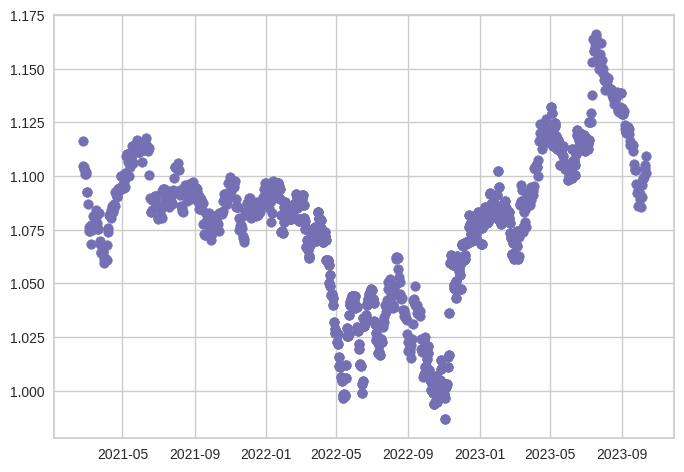

In [49]:
plt.scatter(data_rate_df.date, data_rate_df.rate)
plt.show()

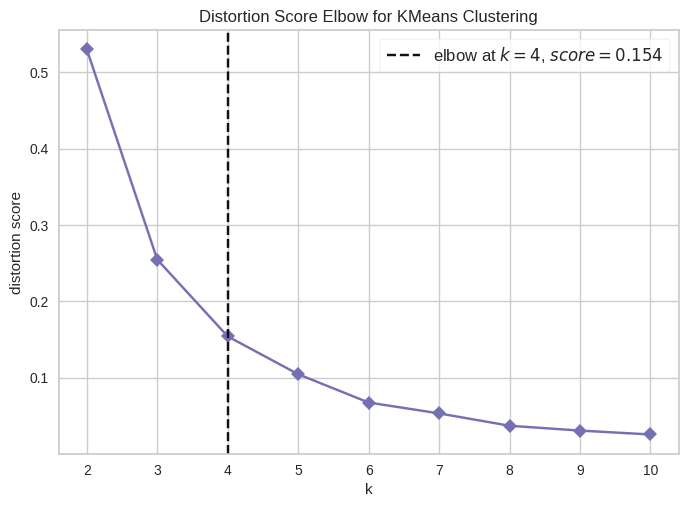

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
set_palette('dark')

# Використання KElbowVisualizer для знаходження оптимальної кількості кластерів
kmeans_model = KMeans(n_init='auto')

# Метрика Distortion
elbow_visualizer = KElbowVisualizer(kmeans_model, k=(2, 11), timings=False, color='purple')
elbow_visualizer.fit(data_rate_df[['rate']])
elbow_visualizer.show()


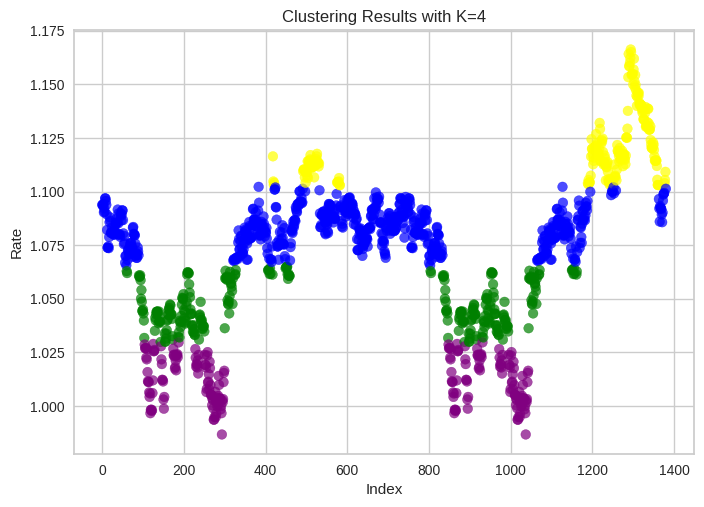

In [29]:
# Кластеризація даних і візуалізація результатів
k = 4
final_kmeans = KMeans(n_clusters=k, n_init='auto')
cluster_labels = final_kmeans.fit_predict(data_rate_df[['rate']])

cluster_colors = {0: 'yellow', 1: 'purple', 2: 'green', 3: 'blue'}
color_mapping = [cluster_colors[label] for label in cluster_labels]

plt.scatter(data_rate_df.index, data_rate_df['rate'], c=color_mapping, alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Rate')
plt.title(f'Clustering Results with K={k}')
plt.show()